In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
df = pd.read_excel('PCA_DATASET.xlsx')
df

,Plant,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count
0,UKH,4.060000,2.00,0.250000,0.5,0,48.0,NaN,NaN,NaN,0.00,0
1,U033,5.046588,7.00,0.823529,1.0,19,1.0,25.0,8.0,7.0,0.75,232
2,U036,4.531578,3.40,0.812500,0.8,1,NaN,153.0,48.0,539.0,0.82,348
3,U040,3.990000,5.43,0.562500,0.6,12,0.0,0.0,10.0,33.0,0.55,131
4,U048,4.060000,3.20,0.705882,1.0,25,2.0,1.0,4.0,1017.0,0.58,299
...,...,...,...,...,...,...,...,...,...,...,...,...
63,UDQ,4.229898,2.53,0.750000,1.0,187,1.0,147.0,46.0,4447.0,0.64,338
64,UDS,5.180000,2.53,0.812500,1.0,380,2.0,116.0,103.0,3561.0,0.73,650
65,USM,4.229898,3.93,0.823529,0.8,46,2.0,2.0,NaN,5537.0,0.83,253
66,UGR,4.393713,6.40,0.875000,1.0,2240,9.0,695.0,31.0,104.0,0.82,520


In [22]:
#getting rid of the identifier column
df = df.iloc[:,1:]
df

,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count
0,4.060000,2.00,0.250000,0.5,0,48.0,NaN,NaN,NaN,0.00,0
1,5.046588,7.00,0.823529,1.0,19,1.0,25.0,8.0,7.0,0.75,232
2,4.531578,3.40,0.812500,0.8,1,NaN,153.0,48.0,539.0,0.82,348
3,3.990000,5.43,0.562500,0.6,12,0.0,0.0,10.0,33.0,0.55,131
4,4.060000,3.20,0.705882,1.0,25,2.0,1.0,4.0,1017.0,0.58,299
...,...,...,...,...,...,...,...,...,...,...,...
63,4.229898,2.53,0.750000,1.0,187,1.0,147.0,46.0,4447.0,0.64,338
64,5.180000,2.53,0.812500,1.0,380,2.0,116.0,103.0,3561.0,0.73,650
65,4.229898,3.93,0.823529,0.8,46,2.0,2.0,NaN,5537.0,0.83,253
66,4.393713,6.40,0.875000,1.0,2240,9.0,695.0,31.0,104.0,0.82,520


In [23]:
df.shape

(68, 11)

In [24]:
#checking the null values
df.isnull().sum()

Risk Score Card Imputed                                    0
Score Card CLSN Imputed                                    0
Test Coverage Ratio                                        0
Test Coverage Ratio(Critical)                              0
Issues to Cost Center                                      0
FinishedGoods-Without-QC                                   9
Forced QC                                                 23
Verified FMFO compliance in dispatch of Finished Goods    24
Wrong GRR Movement                                        11
Test Coverage Ratio(Other test)                            0
Other all test combined exception count                    0
dtype: int64

In [25]:
df.columns

Index(['Risk Score Card Imputed', 'Score Card CLSN Imputed',
       'Test Coverage Ratio', 'Test Coverage Ratio(Critical)',
       'Issues to Cost Center', 'FinishedGoods-Without-QC', 'Forced QC',
       'Verified FMFO compliance in dispatch of Finished Goods',
       'Wrong GRR Movement', 'Test Coverage Ratio(Other test)',
       'Other all test combined exception count'],
      dtype='object')

In [26]:
#mostly the null values are in features 
#['FinishedGoods-Without-QC', 'Forced QC','Verified FMFO compliance in dispatch of Finished Goods','Wrong GRR Movement']
#Creating Test Flag columns
df['Wrong GRR Test not conducted'] = 0
df['Verified FMFO compliance in dispatch of Finished Goods not conducted'] = 0
df['Forced QC Test not conducted'] = 0
df['FinishedGoods-Without-QC Test not conducted'] = 0

In [27]:
df

,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count,Wrong GRR Test not conducted,Verified FMFO compliance in dispatch of Finished Goods not conducted,Forced QC Test not conducted,FinishedGoods-Without-QC Test not conducted
0,4.060000,2.00,0.250000,0.5,0,48.0,NaN,NaN,NaN,0.00,0,0,0,0,0
1,5.046588,7.00,0.823529,1.0,19,1.0,25.0,8.0,7.0,0.75,232,0,0,0,0
2,4.531578,3.40,0.812500,0.8,1,NaN,153.0,48.0,539.0,0.82,348,0,0,0,0
3,3.990000,5.43,0.562500,0.6,12,0.0,0.0,10.0,33.0,0.55,131,0,0,0,0
4,4.060000,3.20,0.705882,1.0,25,2.0,1.0,4.0,1017.0,0.58,299,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,4.229898,2.53,0.750000,1.0,187,1.0,147.0,46.0,4447.0,0.64,338,0,0,0,0
64,5.180000,2.53,0.812500,1.0,380,2.0,116.0,103.0,3561.0,0.73,650,0,0,0,0
65,4.229898,3.93,0.823529,0.8,46,2.0,2.0,NaN,5537.0,0.83,253,0,0,0,0
66,4.393713,6.40,0.875000,1.0,2240,9.0,695.0,31.0,104.0,0.82,520,0,0,0,0


In [28]:
#filling the value by 1 everytime the test was not conducted 

df.loc[df[df['Wrong GRR Movement'].isnull()].index,['Wrong GRR Test not conducted']] = 1

df.loc[df[df['Forced QC'].isnull()].index,['Forced QC Test not conducted']] = 1

df.loc[df[df['Verified FMFO compliance in dispatch of Finished Goods'].isnull()].index,['Verified FMFO compliance in dispatch of Finished Goods not conducted']] = 1

df.loc[df[df['FinishedGoods-Without-QC'].isnull()].index,['FinishedGoods-Without-QC Test not conducted']] = 1

In [29]:
#now filling the rest of the null values by 0
df.fillna(0,inplace=True)

In [30]:
df.isnull().sum()

Risk Score Card Imputed                                                 0
Score Card CLSN Imputed                                                 0
Test Coverage Ratio                                                     0
Test Coverage Ratio(Critical)                                           0
Issues to Cost Center                                                   0
FinishedGoods-Without-QC                                                0
Forced QC                                                               0
Verified FMFO compliance in dispatch of Finished Goods                  0
Wrong GRR Movement                                                      0
Test Coverage Ratio(Other test)                                         0
Other all test combined exception count                                 0
Wrong GRR Test not conducted                                            0
Verified FMFO compliance in dispatch of Finished Goods not conducted    0
Forced QC Test not conducted          

In [31]:
#reducing the dimensionality 
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df.values)
pca.explained_variance_ratio_
#90 % variance is captured in two principal componenrs

array([0.51549286, 0.40057281])

In [32]:
principalComponents

array([[-7.40328496e+02, -5.00528982e+02],
       [-5.09408629e+02, -4.64216207e+02],
       [-4.55281607e+02,  7.93747134e+01],
       [-6.13789138e+02, -4.51183014e+02],
       [-5.71142240e+02,  5.45897634e+02],
       [-6.61496501e+02,  1.08994783e+03],
       [-2.16756028e+02, -4.32525467e+02],
       [-5.23146220e+02, -1.73133304e+02],
       [-5.63536246e+02, -4.77467472e+02],
       [-7.40264757e+02, -5.00510366e+02],
       [-7.40320911e+02, -5.00492553e+02],
       [-7.40319649e+02, -5.00486059e+02],
       [-7.40319686e+02, -5.00486204e+02],
       [-7.40319674e+02, -5.00486160e+02],
       [-5.79208273e+02, -3.99579462e+02],
       [-7.40319552e+02, -5.00486064e+02],
       [-7.40259230e+02, -5.00483760e+02],
       [-4.95106619e+02, -4.38846254e+02],
       [-7.36583052e+02, -5.00357260e+02],
       [-7.37807084e+02, -4.99222221e+02],
       [-3.56684237e+02, -4.21552211e+02],
       [-7.40319465e+02, -5.00485878e+02],
       [-2.80525638e+02, -4.37494642e+02],
       [-7.

In [42]:
pcadf = pd.DataFrame(principalComponents,columns = ['PCA1','PCA2'])
pcadf.head(4)

,PCA1,PCA2
0,-740.328496,-500.528982
1,-509.408629,-464.216207
2,-455.281607,79.374713
3,-613.789138,-451.183014


In [43]:
#Reload the original data to restore the Plant column in the pcadf
df = pd.read_excel('PCA_DATASET.xlsx')["Plant"]
df

0      UKH
1     U033
2     U036
3     U040
4     U048
      ... 
63     UDQ
64     UDS
65     USM
66     UGR
67     UOI
Name: Plant, Length: 68, dtype: object

In [44]:
#adding the plants column to pcadf
pcadf['Plant'] = df
pcadf

,PCA1,PCA2,Plant
0,-740.328496,-500.528982,UKH
1,-509.408629,-464.216207,U033
2,-455.281607,79.374713,U036
3,-613.789138,-451.183014,U040
4,-571.142240,545.897634,U048
...,...,...,...
63,-945.926548,3955.190986,UDQ
64,-512.742390,3116.415716,UDS
65,-1184.100359,5023.984288,USM
66,-74.209400,-323.124927,UGR


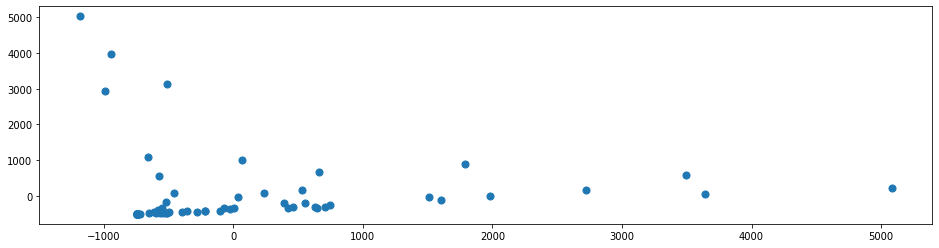

In [45]:
#visualizing the data in two dimension
plt.figure(figsize = (16,4))
plt.scatter(pcadf.PCA1,pcadf.PCA2,s=50)
plt.show()

## Building the clustering Model

In [46]:
Kmean = KMeans(n_clusters=6)
Kmean.fit(pcadf.iloc[:,:-1])

pcadf['Clusters'] = Kmean.predict(pcadf.iloc[:,:-1])


In [47]:
pcadf

,PCA1,PCA2,Plant,Clusters
0,-740.328496,-500.528982,UKH,0
1,-509.408629,-464.216207,U033,0
2,-455.281607,79.374713,U036,0
3,-613.789138,-451.183014,U040,0
4,-571.142240,545.897634,U048,5
...,...,...,...,...
63,-945.926548,3955.190986,UDQ,2
64,-512.742390,3116.415716,UDS,2
65,-1184.100359,5023.984288,USM,2
66,-74.209400,-323.124927,UGR,1


In [16]:
pcadf['Clusters'].value_counts()

3    38
1    15
4     5
2     4
5     3
0     3
Name: Clusters, dtype: int64

#### Vizulaization

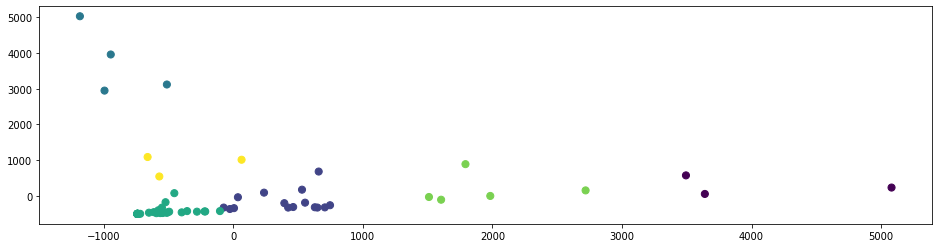

In [17]:
plt.figure(figsize = (16,4))
plt.scatter(pcadf.PCA1,pcadf.PCA2,s=50,c = Kmean.labels_)
plt.show()

In [49]:
#Attaching the clustering results to the original raw data
raw_df = pd.read_excel('PCA_DATASET.xlsx')

raw_df = pd.merge(raw_df,pcadf,on='Plant',how='inner')
raw_df

,Plant,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count,PCA1,PCA2,Clusters
0,UKH,4.060000,2.00,0.250000,0.5,0,48.0,NaN,NaN,NaN,0.00,0,-740.328496,-500.528982,0
1,U033,5.046588,7.00,0.823529,1.0,19,1.0,25.0,8.0,7.0,0.75,232,-509.408629,-464.216207,0
2,U036,4.531578,3.40,0.812500,0.8,1,NaN,153.0,48.0,539.0,0.82,348,-455.281607,79.374713,0
3,U040,3.990000,5.43,0.562500,0.6,12,0.0,0.0,10.0,33.0,0.55,131,-613.789138,-451.183014,0
4,U048,4.060000,3.20,0.705882,1.0,25,2.0,1.0,4.0,1017.0,0.58,299,-571.142240,545.897634,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,UDQ,4.229898,2.53,0.750000,1.0,187,1.0,147.0,46.0,4447.0,0.64,338,-945.926548,3955.190986,2
64,UDS,5.180000,2.53,0.812500,1.0,380,2.0,116.0,103.0,3561.0,0.73,650,-512.742390,3116.415716,2
65,USM,4.229898,3.93,0.823529,0.8,46,2.0,2.0,NaN,5537.0,0.83,253,-1184.100359,5023.984288,2
66,UGR,4.393713,6.40,0.875000,1.0,2240,9.0,695.0,31.0,104.0,0.82,520,-74.209400,-323.124927,1


In [51]:
#Profile your clusters by investigation each cluster group
raw_df[raw_df["Clusters"]==3]

,Plant,Risk Score Card Imputed,Score Card CLSN Imputed,Test Coverage Ratio,Test Coverage Ratio(Critical),Issues to Cost Center,FinishedGoods-Without-QC,Forced QC,Verified FMFO compliance in dispatch of Finished Goods,Wrong GRR Movement,Test Coverage Ratio(Other test),Other all test combined exception count,PCA1,PCA2,Clusters
59,U025,4.060000,3.20,0.764706,0.8,235,2.0,6.0,115.0,0.0,0.75,5872,5080.672734,236.270032,3
60,URR,4.300068,2.67,0.823529,0.8,105,2.0,104.0,466.0,NaN,0.83,4397,3639.673347,57.612487,3
61,UTN,3.990000,4.73,0.882353,1.0,256,7.0,30.0,108.0,537.0,0.83,4332,3493.837319,576.431718,3
